In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("/content/iris.csv",index_col=0)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [6]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


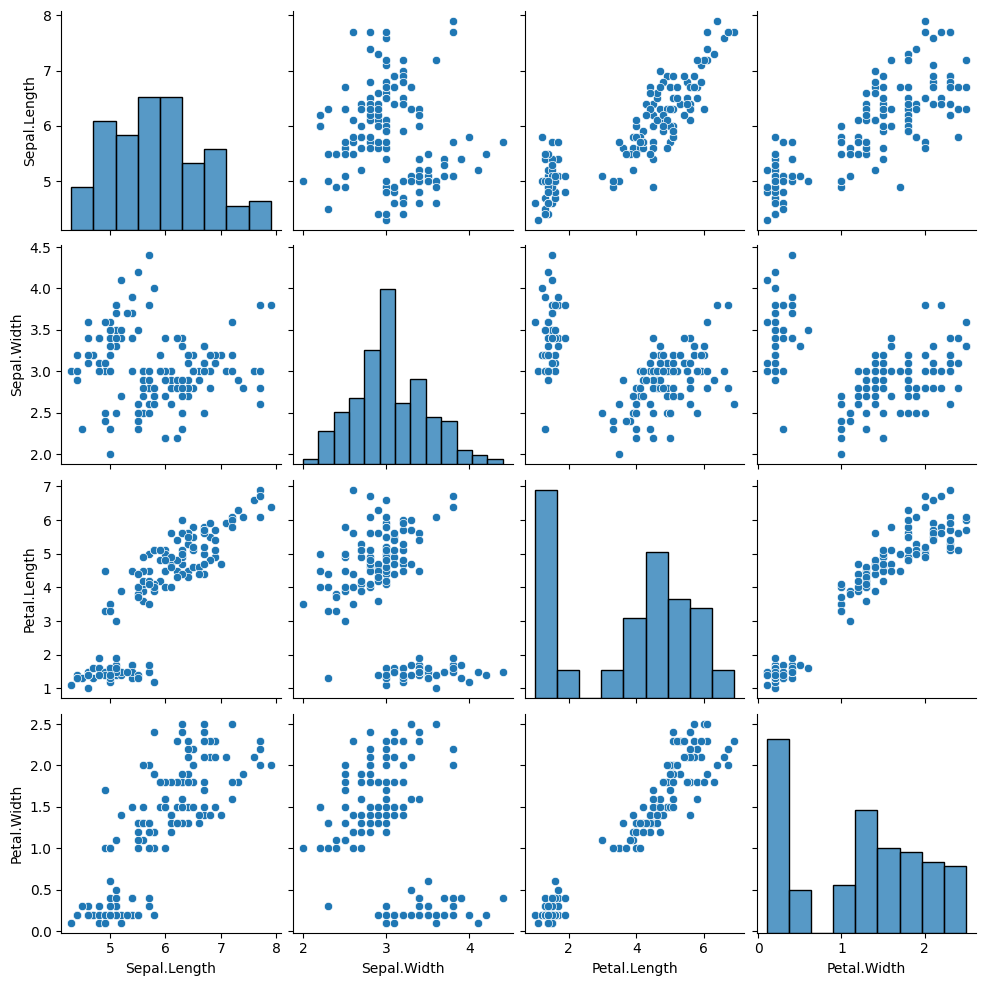

In [7]:
sns.pairplot(df)

In [8]:
df['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


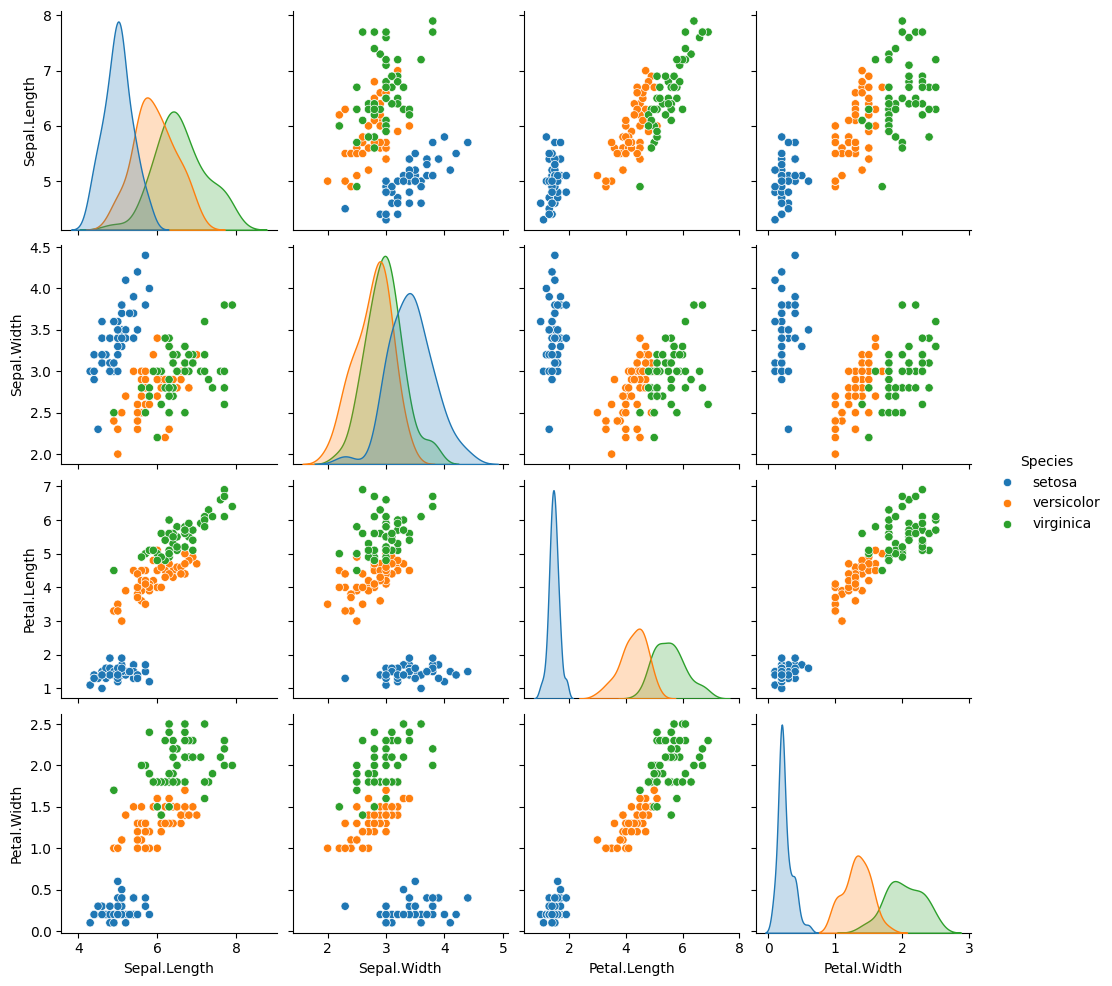

In [9]:
sns.pairplot(df,hue='Species')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [11]:
df['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


In [12]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:,:-1]
y = df['Species']

In [17]:
y

,Species
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
ytrain

,Species
5,0
33,0
143,2
86,1
87,1
...,...
72,1
107,2
15,0
93,1


In [20]:
ytrain = le.fit_transform(ytrain)

In [21]:
df['Species'].unique()

array([0, 1, 2])

In [22]:
svc.fit(xtrain,ytrain)

SVC()

In [23]:
ypred = svc.predict(xtest)

In [24]:
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [25]:
from sklearn.metrics import classification_report

In [26]:
ytest = le.fit_transform(ytest)

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [28]:
print(svc.score(xtest,ytest),svc.score(xtest,ytest))

1.0 1.0


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    "C" : [0.1,0.001,1,2,3,4,5],
    "kernel" : ['linear','poly','rbf'],
    "gamma" : [0.1,0.001,1,2,5]
}

In [31]:
grid = GridSearchCV(SVC(),params,verbose=1)

In [32]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.001, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [33]:
xtrain

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5,5.0,3.6,1.4,0.2
33,5.2,4.1,1.5,0.1
143,5.8,2.7,5.1,1.9
86,6.0,3.4,4.5,1.6
87,6.7,3.1,4.7,1.5
...,...,...,...,...
72,6.1,2.8,4.0,1.3
107,4.9,2.5,4.5,1.7
15,5.8,4.0,1.2,0.2
93,5.8,2.6,4.0,1.2


In [34]:
grid.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [35]:
svc = SVC(C=2,gamma=0.1,kernel='linear')

In [36]:
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [37]:
print("Training Accuracy",svc.score(xtrain,ytrain))
print("Testing Accuracy",svc.score(xtest,ytest))

Training Accuracy 0.9821428571428571
Testing Accuracy 1.0
